In [1]:
import pickle
import sys

import numpy as np
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE

from src.models import SignalNormalization
from src.utils import scatter_random

PWD = '../..'
sys.path.append(PWD)

DATASET_PATH = '../../data/dataset/dataset.pkl'
DATASET_S45_PATH = '../../data/dataset/dataset_s45.pkl'
DATASET_R354331_PATH = '../../data/dataset/dataset_r354331.pkl'
DATASET_R354332_PATH = '../../data/dataset/dataset_r354332.pkl'
DATASET_R370138_PATH = '../../data/dataset/dataset_r370138.pkl'

IMAGES_DIR = PWD + '/data/images/dataset_visualisation/'

In [2]:
with open(DATASET_PATH, 'rb') as file:
    dataset = pickle.load(file)

with open(DATASET_S45_PATH, 'rb') as file:
    dataset_s45 = pickle.load(file)

with open(DATASET_R354331_PATH, 'rb') as file:
    dataset_r354331 = pickle.load(file)

with open(DATASET_R354332_PATH, 'rb') as file:
    dataset_r354332 = pickle.load(file)

with open(DATASET_R370138_PATH, 'rb') as file:
    dataset_r370138 = pickle.load(file)

# Both sectors

In [3]:
waveforms, labels = [], []

for p_ch, data in dataset.items():
    waveforms.extend(data[0])
    labels.extend(["s56"] * len(data[0]))
for p_ch, data in dataset_s45.items():
    waveforms.extend(data[0])
    labels.extend(["s45"] * len(data[0]))

waveforms = np.array(waveforms)

In [4]:
SMALL_STEP = 1500

waveforms_small, labels_small = [], []

for p_ch, data in dataset.items():
    waveforms_small.extend(data[0][:SMALL_STEP])
    labels_small.extend(["s56"] * len(data[0][:SMALL_STEP]))
for p_ch, data in dataset_s45.items():
    waveforms_small.extend(data[0][:SMALL_STEP])
    labels_small.extend(["s45"] * len(data[0][:SMALL_STEP]))

waveforms_small = np.array(waveforms_small)
labels_small = np.array([str(label) for label in labels_small])

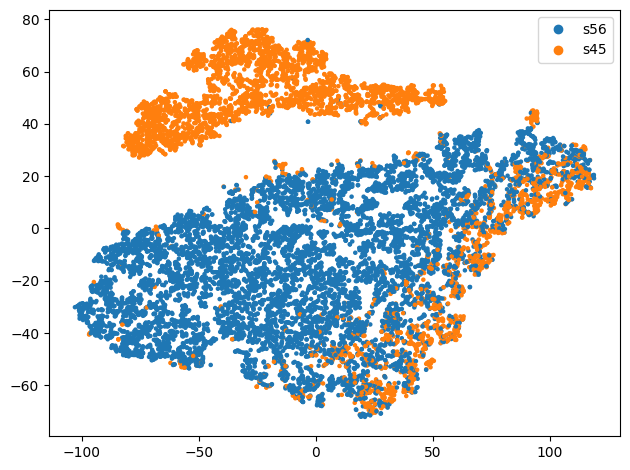

In [5]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(waveforms_small)

scatter_random(X_tsne, labels_small, size=5)
plt.show()

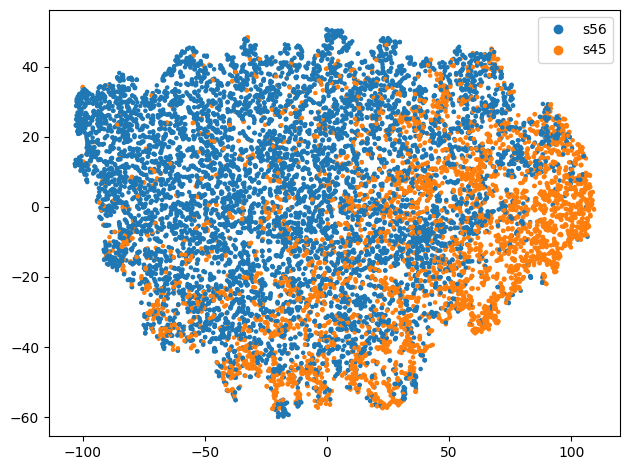

In [6]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(SignalNormalization()(waveforms_small))

scatter_random(X_tsne, labels_small, size=5)
plt.show()

# Many runs - 354332 vs 355207 vs 370138

In [7]:
SMALL_STEP = 1000

waveforms_small, labels_small = [], []

for p_ch, data in dataset_r354332.items():
    waveforms_small.extend(data[0][:SMALL_STEP])
    labels_small.extend(["r354332"] * len(data[0][:SMALL_STEP]))
for p_ch, data in dataset.items():
    waveforms_small.extend(data[0][:SMALL_STEP])
    labels_small.extend(["r355207"] * len(data[0][:SMALL_STEP]))
for p_ch, data in dataset_r370138.items():
    waveforms_small.extend(data[0][:SMALL_STEP])
    labels_small.extend(["r370138"] * len(data[0][:SMALL_STEP]))

waveforms_small = np.array(waveforms_small)
labels_small = np.array([str(label) for label in labels_small])

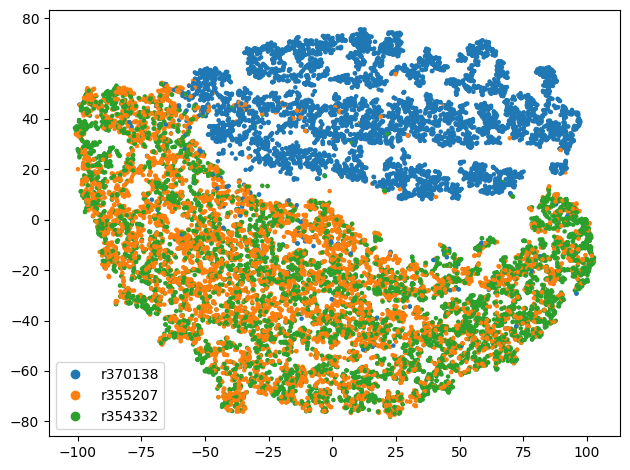

In [8]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(waveforms_small)

scatter_random(X_tsne, labels_small, size=5)
plt.show()

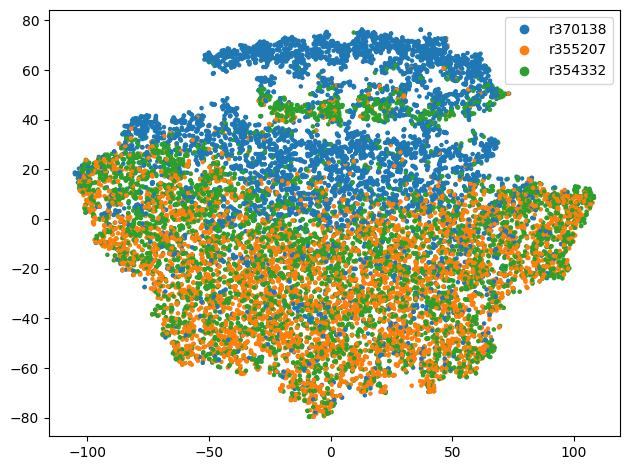

In [9]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(SignalNormalization()(waveforms_small))

scatter_random(X_tsne, labels_small, size=5)
plt.show()